# Neural Networks for Classification, and Clustering

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 2052418 # COMPLETE
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [41 56 50 48 45 54 54 48 55 49]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


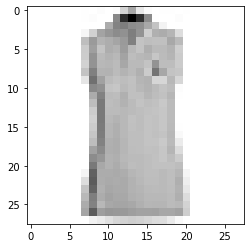

LABEL: 0
INPUT:


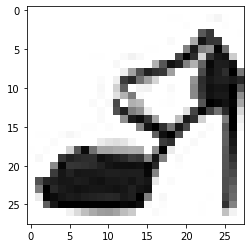

LABEL: 5
INPUT:


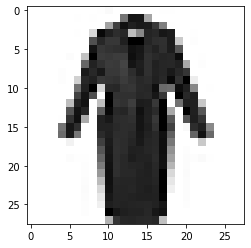

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = MLPClassifier(max_iter=300,alpha=1e-4,solver='sgd',tol=1e-4,learning_rate_init=.1,random_state=ID) #ADD YOUR CODE
    
GS = GridSearchCV(mlp_cv,hl_parameters,cv=5)
GS.fit(X_train,y_train)
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(GS.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(GS.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
print(GS.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.8

All scores on the grid:
[0.582 0.8   0.356 0.792]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

When we use a small number of nodes in the hidden layer the model underfit.
The best performance is given by the model with a single hidden layer and 50 nodes.
The model with 2 hidden layer and 50 nodes in each of them has a slightly worst performance.

A larger number of nodes could lead to overfit, however a small number of nodes lead to underfit

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV

mlp = GS.best_estimator_ #ADD YOUR CODE
mlp.fit(X_train,y_train)

training_error = 1 - mlp.score(X_train,y_train) #ADD YOUR CODE

test_error = 1 - mlp.score(X_test,y_test) #ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.214655


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1060,  989,  991,  971, 1014, 1001,  986, 1020,  963, 1005],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = MLPClassifier(max_iter=300,alpha=1e-4,solver='sgd',tol=1e-4,learning_rate_init=.1,random_state=ID) #ADD YOUR CODE

GS_large = GridSearchCV(mlp_large_cv,hl_parameters,cv=5)
GS_large.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(GS_large.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(GS_large.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
print()
print(GS_large.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.8573000000000001

All scores on the grid:

[0.791  0.8573 0.6481 0.8513]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

There is an increasing in the score of the all the models that I used. The models with the best performance is the same as before (single hidden layer with 50 nodes)

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV

best_mlp_large = GS_large.best_estimator_ #ADD YOUR CODE
best_mlp_large.fit(X_train,y_train)

training_error = 1 - best_mlp_large.score(X_train,y_train) #ADD YOUR CODE

test_error = 1 - best_mlp_large.score(X_test,y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.001800
Best NN test error: 0.148520


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The resulting architecture are the same but the performance improve drastically. Indeed the test error goes from 0.214 to 0.149. 

The errors are given by the fact that we must increase the iterations.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

In [ ]:
#ADD YOUR CODE
pred500 = mlp.predict(X_test)
pred10000 = best_mlp_large.predict(X_test)

for i in np.random.permutation(len(y_test)):
    if pred500[i] != y_test[i] and pred10000[i] == y_test[i]:
        plot_input(X_test,y_test,i)
        print("Wrong label of the small model:", pred500[i])
        break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


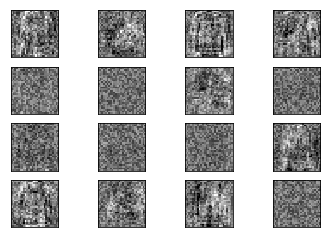

Weights with 10000 data points:


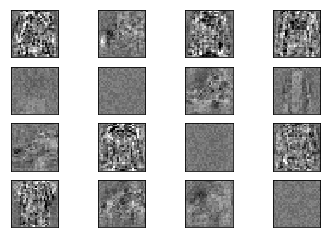

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

The weights in the latter model are more defined and it is possible for some of them to see the shape of the object. It means that the weight reflect the classes more realistically 

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

In [17]:
# ADD YOUR CODE
from sklearn.svm import SVC

parameters = {'kernel':['linear','rbf'],
             'C': [1, 10, 100]}

GS = GridSearchCV(SVC(),parameters,cv=5,verbose=True)
GS.fit(X_train,y_train)
print(GS.best_params_)

SVM_model = GS.best_estimator_
SVM_model.fit(X_train,y_train)

training_error_other = 1 - SVM_model.score(X_train,y_train) #ADD YOUR CODE

test_error_other = 1 - SVM_model.score(X_test,y_test) #ADD YOUR CODE

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 10, 'kernel': 'rbf'}
RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.013200
Best test error (other model): 0.121400


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

I used a SVC and the best parameters that came out is (C=10, kernel="linear")
The test error is equal to 0.12
It's slightly better that the NN performance

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [18]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [19]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [20]:
kmeans = KMeans(n_clusters=10,n_init=10,random_state=ID) #COMPLETE
kmeans.fit(X_train) # ADD CODE

KMeans(n_clusters=10, random_state=2052418)

## Comparison of clusters with true labels

# TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [21]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
#ADD CODE
print(sklearn.metrics.cluster.contingency_matrix(y_train,kmeans.predict(X_train)))

[[  0  48 104   8   0   0   0   8  19   0]
 [  0   6   6   2   0   0   0 188   2   0]
 [  1  27   3 107   0   0   1   0  62   0]
 [  0  38  64   0   0   0   0 111   7   0]
 [  1   9  28 124   0   0   1   4  34   0]
 [  1  71   0   0  33   3   0   0   0  91]
 [  2  33  32  45   0   0   1   3  53   0]
 [  0   6   0   0  29   0   0   0   0 182]
 [ 80  16   0   1   4   1  76   2   3   4]
 [  0   4   0   0  99 105   1   1   2   3]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

The clustering doesn't follow the true classification. Indeed if would follow the classification the largest numbers should be in the diagonal of the matrix. For the majority of the classes however the classification is effective

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [30]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters
minim = 1

# list containing all the scores
score = []

for i in range(2,16):
    #ADD CODE
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=ID)
    kmeans.fit(X_train)
    silhouttescore = sklearn.metrics.silhouette_score(X_train,kmeans.predict(X_train),random_state=ID) #COMPLETE
    #append all the element in the list
    score.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

print("\n")

#find the maximum score and print the number k
max_score = max(score)
print("The highest score %f is obtained with k=%x" % (max_score, score.index(max_score)+2))

Silhoutte coefficient for number of clusters=2: 0.1883270861332579
Silhoutte coefficient for number of clusters=3: 0.18897555098242189
Silhoutte coefficient for number of clusters=4: 0.18825600158566708
Silhoutte coefficient for number of clusters=5: 0.16762336680616688
Silhoutte coefficient for number of clusters=6: 0.16092239403107358
Silhoutte coefficient for number of clusters=7: 0.16859249461155784
Silhoutte coefficient for number of clusters=8: 0.16612609318630336
Silhoutte coefficient for number of clusters=9: 0.15974825315820051
Silhoutte coefficient for number of clusters=10: 0.15643634467531564
Silhoutte coefficient for number of clusters=11: 0.1440031203912429
Silhoutte coefficient for number of clusters=12: 0.13691674916525517
Silhoutte coefficient for number of clusters=13: 0.13369104059960643
Silhoutte coefficient for number of clusters=14: 0.13080079312767978
Silhoutte coefficient for number of clusters=15: 0.12994540811474956


The highest score 0.188976 is obtained wit

## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

The number of clusters that give the maximum score is k=3
It doesn't reflect what I know about the data (there are 10 different classes)

It could depend by the fact that the classes are similar. Indeed the classifier could have created a class clothes (t-shirt, pullover, coat...), a class shoes (sandal, sneaker, ankle boot) and a class others (bag, trouser)